In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#tf.keras.optimizers.RMSprop

#4 features
def holmanweigert(mu_temp,ecc_temp):
    ahw = (1.6)+(5.1)*ecc_temp+(-2.22)*ecc_temp**2+(4.12)*mu_temp+(-4.27)*ecc_temp*mu_temp+(-5.09)*mu_temp**2+(4.61)*ecc_temp**2*mu_temp**2
    return(ahw)

v_ahw = np.vectorize(holmanweigert)

In [2]:



mu = [0.05,0.1,0.2,0.3,0.35,0.4,0.5]
#mu=[0.1]
ecc = np.arange(80)/100
print(ecc)
feature_data = np.zeros((4))
labels = np.zeros(1)
a_planet_real = np.zeros(1)

for m in mu:
    for e in ecc:
        filename = 'training_data/rebound'+str(m)+'_'+str(e)+'.txt'
        print(filename)
        try:
            mass_ratio, bin_ecc, a_planet, xi, stable = np.loadtxt(filename, skiprows=200, max_rows=600,unpack=True)
        except OSError:
            print(filename,'file not found')
            continue
        except UnicodeDecodeError:
            print(filename, 'has a big issue')
            continue
        print(mass_ratio.shape)
        zeta = np.sqrt((a_planet/1)**3)
        epsilon = 0.5*(zeta-np.floor(zeta))
        hw_temp = v_ahw(mass_ratio,bin_ecc)
        a_planet_temp = (a_planet/hw_temp)-1
        feature_temp = np.array([mass_ratio,bin_ecc,a_planet_temp,epsilon])
        feature_data = np.vstack((feature_data,np.transpose(feature_temp)))
        labels = np.concatenate((labels,stable))
        a_planet_real = np.concatenate((a_planet_real,a_planet))
        
print(feature_data.shape,labels.shape, a_planet_real.shape)



[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79]
training_data/rebound0.05_0.0.txt
(600,)
training_data/rebound0.05_0.01.txt
(600,)
training_data/rebound0.05_0.02.txt
(600,)
training_data/rebound0.05_0.03.txt
(600,)
training_data/rebound0.05_0.04.txt
(600,)
training_data/rebound0.05_0.05.txt
(600,)
training_data/rebound0.05_0.06.txt
(600,)
training_data/rebound0.05_0.07.txt
(600,)
training_data/rebound0.05_0.08.txt
(600,)
training_data/rebound0.05_0.09.txt
(600,)
training_data/rebound0.05_0.1.txt
(600,)
training_data/rebound0.05_0.11.txt
(600,)
training_data/rebound0.05_0.12.txt
(600,)
training_data/rebound0.05_0.13.txt
(600,)
trainin

training_data/rebound0.2_0.36.txt
(600,)
training_data/rebound0.2_0.37.txt
(600,)
training_data/rebound0.2_0.38.txt
(600,)
training_data/rebound0.2_0.39.txt
(600,)
training_data/rebound0.2_0.4.txt
(600,)
training_data/rebound0.2_0.41.txt
(600,)
training_data/rebound0.2_0.42.txt
(600,)
training_data/rebound0.2_0.43.txt
(600,)
training_data/rebound0.2_0.44.txt
(600,)
training_data/rebound0.2_0.45.txt
(600,)
training_data/rebound0.2_0.46.txt
(600,)
training_data/rebound0.2_0.47.txt
(600,)
training_data/rebound0.2_0.48.txt
(600,)
training_data/rebound0.2_0.49.txt
(600,)
training_data/rebound0.2_0.5.txt
(600,)
training_data/rebound0.2_0.51.txt
(600,)
training_data/rebound0.2_0.52.txt
(600,)
training_data/rebound0.2_0.53.txt
(600,)
training_data/rebound0.2_0.54.txt
(600,)
training_data/rebound0.2_0.55.txt
(600,)
training_data/rebound0.2_0.56.txt
(600,)
training_data/rebound0.2_0.57.txt
(600,)
training_data/rebound0.2_0.58.txt
(600,)
training_data/rebound0.2_0.59.txt
(600,)
training_data/rebo

training_data/rebound0.35_0.77.txt
(600,)
training_data/rebound0.35_0.78.txt
(600,)
training_data/rebound0.35_0.79.txt
(600,)
training_data/rebound0.4_0.0.txt
(600,)
training_data/rebound0.4_0.01.txt
(600,)
training_data/rebound0.4_0.02.txt
(600,)
training_data/rebound0.4_0.03.txt
(600,)
training_data/rebound0.4_0.04.txt
(600,)
training_data/rebound0.4_0.05.txt
(600,)
training_data/rebound0.4_0.06.txt
(600,)
training_data/rebound0.4_0.07.txt
(600,)
training_data/rebound0.4_0.08.txt
(600,)
training_data/rebound0.4_0.09.txt
(600,)
training_data/rebound0.4_0.1.txt
(600,)
training_data/rebound0.4_0.11.txt
(600,)
training_data/rebound0.4_0.12.txt
(600,)
training_data/rebound0.4_0.13.txt
(600,)
training_data/rebound0.4_0.14.txt
(600,)
training_data/rebound0.4_0.15.txt
(600,)
training_data/rebound0.4_0.16.txt
(600,)
training_data/rebound0.4_0.17.txt
(600,)
training_data/rebound0.4_0.18.txt
(600,)
training_data/rebound0.4_0.19.txt
(600,)
training_data/rebound0.4_0.2.txt
(600,)
training_data/re

In [3]:
#separate training and testing data
from sklearn.model_selection import train_test_split
#feature_data = feature_data[1:,:]
#labels = labels[1:]
cols = ['mass ratio', 'binary eccentricity', 'planet a', 'resonance proxy']
df_features = pd.DataFrame(feature_data, columns=cols)

feat_train, feat_test, label_train, label_test = train_test_split(df_features,labels,test_size=0.1)
print(feat_train,label_train)

        mass ratio  binary eccentricity  planet a  resonance proxy
89919         0.10                 0.71  0.171310         0.422753
300475        0.50                 0.38  0.152691         0.311173
168326        0.30                 0.42  0.030391         0.166997
100788        0.20                 0.09  0.213360         0.279139
63699         0.10                 0.28 -0.136387         0.189291
...            ...                  ...       ...              ...
19404         0.05                 0.32 -0.061900         0.016681
200781        0.35                 0.16  0.069421         0.305977
78069         0.10                 0.52 -0.158445         0.363019
163192        0.30                 0.33  0.224492         0.325574
260044        0.40                 0.35 -0.029028         0.051178

[292680 rows x 4 columns] [1. 1. 1. ... 0. 1. 0.]


In [4]:
input_layer = keras.Input(shape=(4,),dtype=np.float32)

output_layer = keras.layers.Dense(1,activation='sigmoid')
optimizer = tf.keras.optimizers.RMSprop

model = keras.Sequential([input_layer,
                                  #keras.layers.Dropout(0.1),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  output_layer])

model.compile(optimizer=keras.optimizers.RMSprop(), loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=["accuracy",keras.metrics.Recall()])

In [5]:
test_1_ecc = feature_data[:,1][feature_data[:,0] == 0.3]
test_1_a = feature_data[:,2][feature_data[:,0] == 0.3]
res_prox_1 = feature_data[:,3][feature_data[:,0] == 0.3]
label_pts_1 = labels[feature_data[:,0] == 0.3]
a_planet_real_test = a_planet_real[feature_data[:,0] == 0.3]
feat_test_1 = np.transpose(np.vstack((np.zeros(len(test_1_ecc))+0.3,test_1_ecc,test_1_a,res_prox_1)))

epochs = [5,10,25,50,75,100]
acc_epochs = np.zeros(6)
#This commented out block was used to optimize the number of training epochs. 
'''
for k in range(6):
    model_temp = keras.Sequential([input_layer,
                                  #keras.layers.Dropout(0.1),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  keras.layers.Dense(48,activation='relu'),
                                  output_layer])

    model_temp.compile(optimizer=keras.optimizers.RMSprop(), loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=["accuracy",keras.metrics.Recall()])
    model_temp.fit(feat_train,label_train,epochs=epochs[k])
    test_scores = model_temp.evaluate(feat_test,label_test,verbose=2)
    test_1_scores = model_temp.evaluate(feat_test_1,label_pts_1)
    acc_epochs[k] = test_1_scores[1]
    print(test_scores)
'''
model.fit(feat_train,label_train,epochs=25)

Epoch 1/25
9147/9147 [==============================] - 8s 824us/step - loss: 0.1270 - accuracy: 0.9468 - recall: 0.9564
Epoch 2/25
9147/9147 [==============================] - 8s 868us/step - loss: 0.1016 - accuracy: 0.9598 - recall: 0.9667
Epoch 3/25
9147/9147 [==============================] - 8s 882us/step - loss: 0.1000 - accuracy: 0.9616 - recall: 0.9677
Epoch 4/25
9147/9147 [==============================] - 8s 879us/step - loss: 0.1053 - accuracy: 0.9616 - recall: 0.9675
Epoch 5/25
9147/9147 [==============================] - 8s 890us/step - loss: 0.1090 - accuracy: 0.9618 - recall: 0.9680
Epoch 6/25
9147/9147 [==============================] - 8s 890us/step - loss: 0.1095 - accuracy: 0.9617 - recall: 0.9695
Epoch 7/25
9147/9147 [==============================] - 8s 900us/step - loss: 0.1037 - accuracy: 0.9622 - recall: 0.9696
Epoch 8/25
9147/9147 [==============================] - 8s 887us/step - loss: 0.1028 - accuracy: 0.9633 - recall: 0.9700
Epoch 9/25
9147/9147 [==========

In [6]:
#plt.plot(epochs,acc_epochs, color='blue')
#plt.xlabel('Training Epochs')
#plt.ylabel('Accuracy on Test Data Set')


test_scores = model.evaluate(feat_test,label_test,verbose=2)
print(test_scores)

1017/1017 - 0s - loss: 0.1117 - accuracy: 0.9587 - recall: 0.9880
[0.11170078814029694, 0.9587343335151672, 0.9879553914070129]


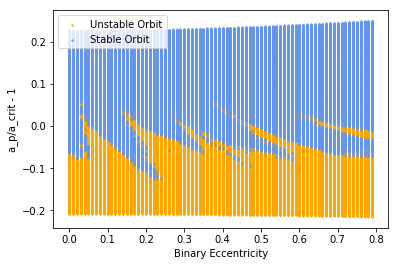

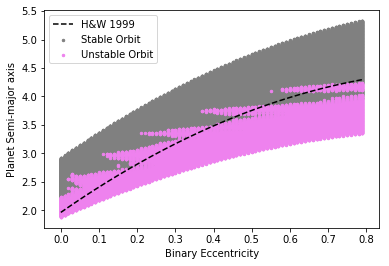

(48000,)
[0.1 0.1 0.1 0.1 0.1]
(48000, 4)
1500/1500 [==============================] - 1s 782us/step - loss: 0.3306 - accuracy: 0.8869 - recall: 0.9255
[0.3306138217449188, 0.8869374990463257, 0.9255319237709045]
[0. 0. 0. ... 1. 1. 1.]


In [8]:
import matplotlib.pyplot as plt
#a_planet_real = a_planet_real[1:]




plt.scatter(test_1_ecc[label_pts_1 == 0],test_1_a[label_pts_1 == 0], color='orange',s=1.5,label='Unstable Orbit')
plt.scatter(test_1_ecc[label_pts_1 == 1],test_1_a[label_pts_1 == 1], color='cornflowerblue',s=1.5,label='Stable Orbit')
plt.xlabel('Binary Eccentricity')
plt.ylabel('a_p/a_crit - 1')
plt.legend(loc='upper left')
plt.show()


ordered = np.argsort(test_1_ecc)
test_1_ecc_sort = test_1_ecc[ordered]
ahw_arr1 = v_ahw(0.1,test_1_ecc_sort)

plt.scatter(test_1_ecc[label_pts_1 == 1],a_planet_real_test[label_pts_1 == 1], color='grey',s=6,label='Stable Orbit')
plt.scatter(test_1_ecc[label_pts_1 == 0],a_planet_real_test[label_pts_1 == 0], color='violet',s=6,label='Unstable Orbit')
plt.plot(test_1_ecc_sort,ahw_arr1, linestyle='--', color='black', label='H&W 1999')
plt.xlabel('Binary Eccentricity')
plt.ylabel('Planet Semi-major axis')
plt.legend(loc='upper left')
plt.show()
print(test_1_ecc.shape)
print(np.zeros(5)+0.1)
feat_test_1 = np.transpose(np.vstack((np.zeros(len(test_1_ecc))+0.1,test_1_ecc,test_1_a,res_prox_1)))
print(feat_test_1.shape)
test_1_scores = model.evaluate(feat_test_1,label_pts_1)
print(test_1_scores)
print(label_pts_1)

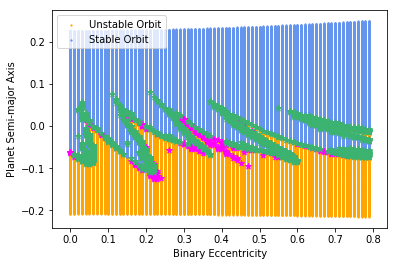

In [9]:
#make predictions


plt.scatter(test_1_ecc[label_pts_1 == 0],test_1_a[label_pts_1 == 0], color='orange',s=1.5,label='Unstable Orbit')
plt.scatter(test_1_ecc[label_pts_1 == 1],test_1_a[label_pts_1 == 1], color='cornflowerblue',s=1.5,label='Stable Orbit')
plt.xlabel('Binary Eccentricity')
plt.ylabel('Planet Semi-major Axis')
plt.legend(loc='upper left')

fp_e_bad = np.empty(0)
fn_e_bad = np.empty(0)

fp_a_bad = np.empty(0)
fn_a_bad = np.empty(0)

ahw_fp = np.empty(0)
ahw_fn = np.empty(0)

for i,e in enumerate(test_1_ecc):
    feature = np.array([[0.3,e,test_1_a[i],res_prox_1[i]]])
    prediction = model.predict(feature)
    if label_pts_1[i] == 0.:
        if round(prediction[0][0]) != 0.:
            fp_e_bad = np.append(fp_e_bad,e)
            fp_a_bad = np.append(fp_a_bad,test_1_a[i])
            #ahw_fp = np.append(ahw_fp,holmanweigert(0.3,e))
    if label_pts_1[i] == 1.:
        if round(prediction[0][0]) != 1.:
            fn_e_bad = np.append(fn_e_bad,e)
            fn_a_bad = np.append(fn_a_bad,test_1_a[i])
            #ahw_fn = np.append(ahw_fn,holmanweigert(0.3,e))
        
plt.scatter(fn_e_bad,(fn_a_bad),marker='*', color='magenta')
plt.scatter(fp_e_bad,(fp_a_bad),marker='*', color='mediumseagreen')

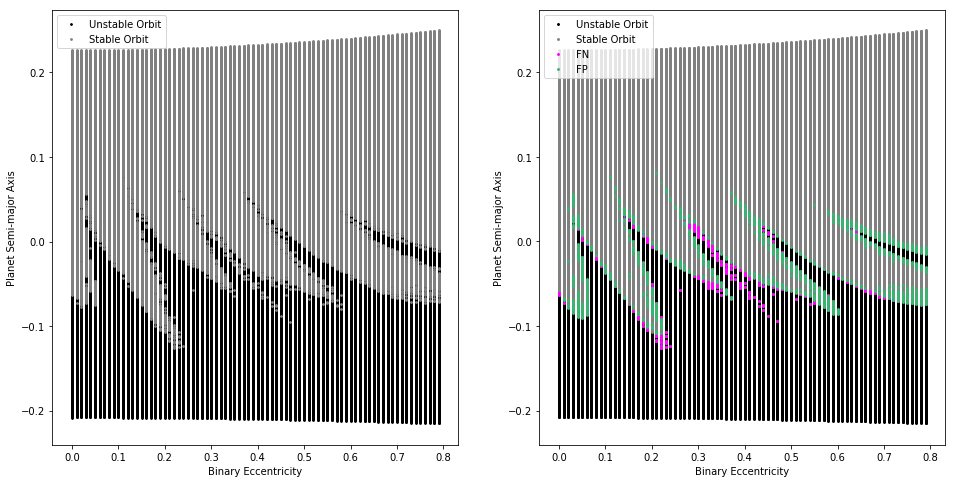

In [10]:
#save neural net
import h5py
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))


ahw_correct = v_ahw(0.1,test_1_ecc)

axes[1].scatter(test_1_ecc[label_pts_1 == 0],test_1_a[label_pts_1 == 0], color='black',s=3.55,label='Unstable Orbit')
axes[1].scatter(test_1_ecc[label_pts_1 == 1],test_1_a[label_pts_1 == 1], color='grey',s=3.5,label='Stable Orbit')
axes[1].scatter(fn_e_bad,fn_a_bad,marker='o', s=3.5,color='magenta', label='FN')
axes[1].scatter(fp_e_bad,fp_a_bad,marker='o', s=3.5,color='mediumseagreen', label='FP')
axes[1].set_xlabel('Binary Eccentricity')
axes[1].set_ylabel('Planet Semi-major Axis')
axes[1].legend(loc='upper left')

axes[0].scatter(test_1_ecc[label_pts_1 == 0],test_1_a[label_pts_1 == 0], color='black',s=3,label='Unstable Orbit')
axes[0].scatter(test_1_ecc[label_pts_1 == 1],test_1_a[label_pts_1 == 1], color='grey',s=3,label='Stable Orbit')
axes[0].set_xlabel('Binary Eccentricity')
axes[0].set_ylabel('Planet Semi-major Axis')
axes[0].legend(loc='upper left')


In [11]:
print(1-(len(fn_e_bad)+len(fp_e_bad))/len(test_1_ecc))

0.96275


In [37]:
from keras.models import load_model

model_lk = load_model('6layer_48neuron.h5') 
fp_e_badlk = np.empty(0)
fn_e_badlk = np.empty(0)

fp_a_badlk = np.empty(0)
fn_a_badlk = np.empty(0)

ahw_fplk = np.empty(0)
ahw_fnlk = np.empty(0)

for i,e in enumerate(test_1_ecc):
    zeta = np.sqrt((a_planet_real_test[i]/1)**3)
    epsilon = 0.5*(zeta-np.floor(zeta))
    feature = np.array([[0.1,test_1_a[i],e,epsilon]])
    prediction = model_lk.predict(feature)
    
    if label_pts_1[i] == 0.:
        if round(prediction[0][0]) != 0.:
            print(prediction, 'false positive')
            print(feature,a_planet_real_test[i])
            fp_e_badlk = np.append(fp_e_badlk,e)
            fp_a_badlk = np.append(fp_a_badlk,test_1_a[i])
            ahw_fplk = np.append(ahw_fplk,holmanweigert(0.3,e))
    if label_pts_1[i] == 1.:
        if round(prediction[0][0]) != 1.:
            fn_e_badlk = np.append(fn_e_badlk,e)
            fn_a_badlk = np.append(fn_a_badlk,test_1_a[i])
            ahw_fnlk = np.append(ahw_fnlk,holmanweigert(0.3,e))


[[0.50058305]] false positive
[[ 0.1        -0.04744627  0.          0.27659706]] 1.8680531291291294
[[0.50144976]] false positive
[[ 0.1        -0.04673446  0.          0.27802825]] 1.8694490510510513
[[0.50230145]] false positive
[[ 0.1        -0.04602265  0.          0.27945998]] 1.8708449729729733
[[0.5034879]] false positive
[[ 0.1        -0.04531085  0.          0.28089224]] 1.8722408948948952
[[0.50577235]] false positive
[[ 0.1        -0.04459904  0.          0.28232504]] 1.8736368168168172
[[0.507461]] false positive
[[ 0.1        -0.04388724  0.          0.28375837]] 1.8750327387387389
[[0.50915235]] false positive
[[ 0.1        -0.04317543  0.          0.28519223]] 1.8764286606606608
[[0.51084197]] false positive
[[ 0.1        -0.04246363  0.          0.28662663]] 1.8778245825825828
[[0.51252997]] false positive
[[ 0.1        -0.04175182  0.          0.28806156]] 1.8792205045045047
[[0.5142162]] false positive
[[ 0.1        -0.04104002  0.          0.28949702]] 1.88061642642

[[0.501503]] false positive
[[0.1        0.07498429 0.         0.03046285]] 2.1081516996997
[[0.50982624]] false positive
[[0.1        0.0756961  0.         0.03198321]] 2.109547621621622
[[0.5247067]] false positive
[[0.1        0.07640791 0.         0.03350407]] 2.1109435435435437
[[0.5611436]] false positive
[[0.1        0.07783152 0.         0.03654729]] 2.1137353873873876
[[0.5869521]] false positive
[[0.1        0.07925513 0.         0.03959253]] 2.1165272312312315
[[0.50095266]] false positive
[[0.1        0.0477252  0.02       0.07813285]] 2.1517032224444446
[[0.5061806]] false positive
[[0.1        0.04843605 0.02       0.0797392 ]] 2.1531630888812816
[[0.5147056]] false positive
[[0.1        0.0491469  0.02       0.08134609]] 2.154622955318118
[[0.5259384]] false positive
[[0.1        0.04985775 0.02       0.08295352]] 2.1560828217549552
[[0.5625662]] false positive
[[0.1        0.05127945 0.02       0.08617003]] 2.159002554628629
[[0.58008903]] false positive
[[0.1        0.

[[0.56025743]] false positive
[[0.1        0.01467828 0.1        0.40802881]] 2.4419866352252253
[[0.60310006]] false positive
[[0.1        0.01538713 0.1        0.41002859]] 2.4436926094594593
[[1.]] false positive
[[0.1        0.04019706 0.1        0.48045884]] 2.503401707657658
[[1.]] false positive
[[0.1        0.04090592 0.1        0.4824836 ]] 2.505107681891892
[[1.]] false positive
[[0.1        0.04161478 0.1        0.48450904]] 2.506813656126126
[[1.]] false positive
[[0.1        0.04232363 0.1        0.48653518]] 2.5085196303603605
[[1.]] false positive
[[0.1        0.04303249 0.1        0.488562  ]] 2.510225604594595
[[1.]] false positive
[[0.1        0.04374134 0.1        0.49058952]] 2.511931578828829
[[1.]] false positive
[[0.1        0.0444502  0.1        0.49261772]] 2.513637553063063
[[1.]] false positive
[[0.1        0.04657676 0.1        0.49870646]] 2.518755475765766
[[0.5999141]] false positive
[[ 0.1        -0.0143964   0.11        0.37482299]] 2.4135715459612617
[

[[1.]] false positive
[[0.1        0.05135563 0.29       0.48969986]] 3.2943650674259253
[[1.]] false positive
[[0.1        0.05206682 0.29       0.49273394]] 3.296593537122222
[[1.]] false positive
[[0.1        0.05277801 0.29       0.49576905]] 3.298822006818518
[[1.]] false positive
[[0.1        0.0534892  0.29       0.49880518]] 3.3010504765148143
[[0.51362]] false positive
[[0.1        0.06984653 0.29       0.06891843]] 3.352305279529629
[[0.56898093]] false positive
[[0.1        0.07055772 0.29       0.07197907]] 3.3545337492259257
[[0.5905724]] false positive
[[0.1        0.07126891 0.29       0.07504073]] 3.3567622189222215
[[0.6066518]] false positive
[[0.1        0.07269129 0.29       0.08116708]] 3.3612191583148143
[[0.61879957]] false positive
[[0.1        0.07340247 0.29       0.08423179]] 3.3634476280111105
[[0.64582413]] false positive
[[0.1        0.07482485 0.29       0.09036424]] 3.367904567403703
[[1.]] false positive
[[0.1        0.03932924 0.3        0.48636992]] 3

[[0.8166231]] false positive
[[0.1        0.06968638 0.66       0.08949557]] 4.3839268676
[[0.5007101]] false positive
[[0.1        0.06109128 0.67       0.06389164]] 4.367606936402703
[[0.5961823]] false positive
[[0.1        0.06182294 0.67       0.06861293]] 4.370618574672372
[[0.6697837]] false positive
[[0.1        0.06328627 0.67       0.0780604 ]] 4.376641851211712
[[0.69432825]] false positive
[[0.1        0.06401794 0.67       0.08278656]] 4.379653489481381
[[0.71848935]] false positive
[[0.1        0.0647496  0.67       0.08751436]] 4.382665127751051
[[0.7558694]] false positive
[[0.1        0.06548127 0.67       0.09224378]] 4.385676766020721
[[0.5923333]] false positive
[[0.1        0.05760771 0.68       0.070233  ]] 4.371651748457256
[[0.60824126]] false positive
[[0.1        0.05834014 0.68       0.07498141]] 4.374679282173372
[[0.6459062]] false positive
[[0.1        0.05907257 0.68       0.07973146]] 4.377706815889488
[[0.6726755]] false positive
[[0.1        0.05980501

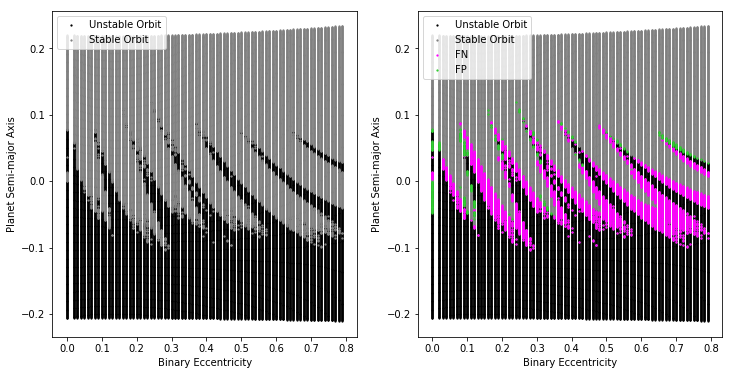

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))


axes[1].scatter(test_1_ecc[label_pts_1 == 0],test_1_a[label_pts_1 == 0], color='black',s=1.5,label='Unstable Orbit')
axes[1].scatter(test_1_ecc[label_pts_1 == 1],test_1_a[label_pts_1 == 1], color='grey',s=1.5,label='Stable Orbit')
axes[1].scatter(fn_e_badlk,fn_a_badlk,marker='o', s=1.5,color='magenta',label='FN')
axes[1].scatter(fp_e_badlk,fp_a_badlk,marker='o', s=1.5,color='limegreen',label='FP')
axes[1].set_xlabel('Binary Eccentricity')
axes[1].set_ylabel('Planet Semi-major Axis')
axes[1].legend(loc='upper left')

axes[0].scatter(test_1_ecc[label_pts_1 == 0],test_1_a[label_pts_1 == 0], color='black',s=1.5,label='Unstable Orbit')
axes[0].scatter(test_1_ecc[label_pts_1 == 1],test_1_a[label_pts_1 == 1], color='grey',s=1.5,label='Stable Orbit')
axes[0].set_xlabel('Binary Eccentricity')
axes[0].set_ylabel('Planet Semi-major Axis')
axes[0].legend(loc='upper left')


In [40]:
print(1-(len(fn_e_badlk)+len(fp_e_badlk))/len(test_1_ecc))


0.900126582278481
